In [78]:
# !pip install kagglehub
# ! mkdir -p ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle competitions download -c titanic

In [79]:
# !unzip titanic.zip

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('./data/Titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
df = df.drop('Name', axis=1) # name is not important for serviving

In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [85]:
group = df.groupby(by=['Embarked', 'Survived']).size().unstack()
group

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [86]:
# df = df[df['Embarked'].notna()]

### delete cabin for so much nan and delete ticket because its not usefull and delete pclass too because we have fair instead of that

In [87]:
x = df[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

x['Age'].fillna(x['Age'].mean(), inplace=True)
x['Sex'] = x['Sex'].map({'male': 0, 'female': 1})
x['Embarked'] = x['Embarked'].map({'S': 0, "C": 1, 'Q': 2})

x.dropna()
x

C:\Users\Radin\AppData\Local\Temp\ipykernel_24932\3989928755.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Age'].fillna(x['Age'].mean(), inplace=True)
C:\Users\Radin\AppData\Local\Temp\ipykernel_24932\3989928755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'].fillna(x['Age'].mean(), inplace=True)
C:\Users\Radin\AppData\Lo

,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,22.000000,1,0,7.2500,0.0
1,1,38.000000,1,0,71.2833,1.0
2,1,26.000000,0,0,7.9250,0.0
3,1,35.000000,1,0,53.1000,0.0
4,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0.0
887,1,19.000000,0,0,30.0000,0.0
888,1,29.699118,1,2,23.4500,0.0
889,0,26.000000,0,0,30.0000,1.0


In [88]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, "C": 1, 'Q': 2})
corr_matrix = df[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].corr()

C:\Users\Radin\AppData\Local\Temp\ipykernel_24932\2910068336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


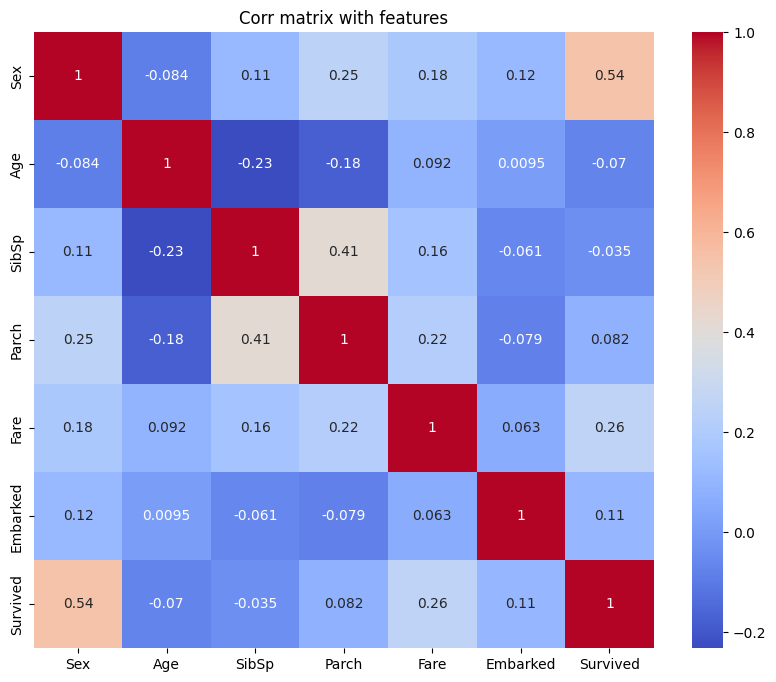

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corr matrix with features')
plt.show()

# Can see corr and connection between features and using random forest model

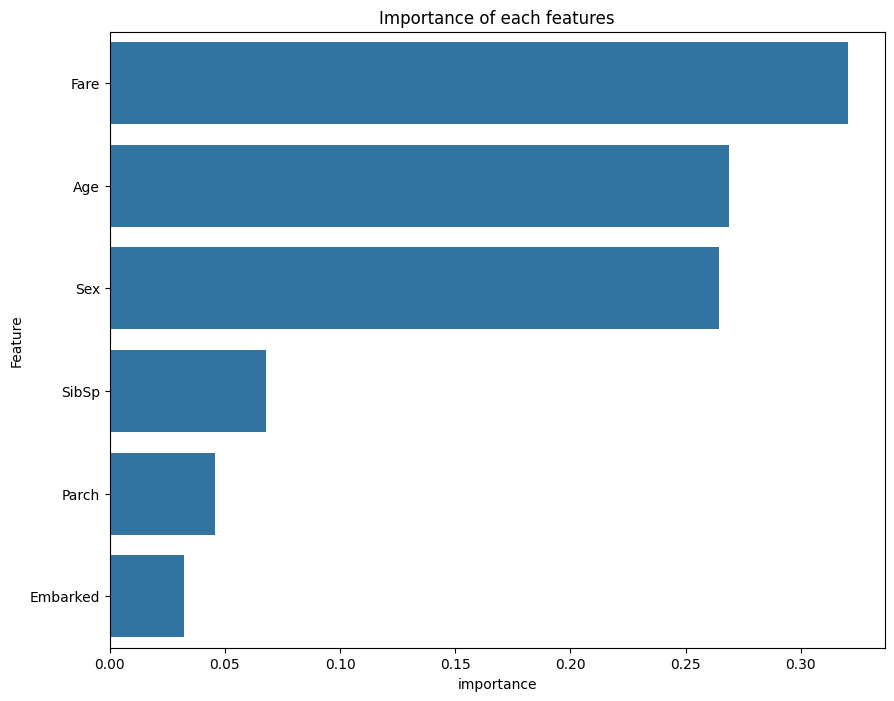

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x, y)

importances = rf.feature_importances_

features = pd.DataFrame({
    'Feature': x.columns,
    'importance': importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='Feature', data=features)
plt.title("Importance of each features")
plt.show()

In [91]:
x['hamrah'] = x['Parch'] + x['SibSp']
x = x[['Age', 'Sex', 'Fare', 'hamrah']]

C:\Users\Radin\AppData\Local\Temp\ipykernel_24932\2461583839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['hamrah'] = x['Parch'] + x['SibSp']


In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x, y)

RandomForestClassifier(random_state=42)

In [93]:
test = pd.read_csv('./data/Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, "C": 1, 'Q': 2})
test['hamrah'] = test['Parch'] + test['SibSp']
test = test[['Age', 'Sex', 'Fare', 'hamrah']]

C:\Users\Radin\AppData\Local\Temp\ipykernel_24932\812753768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean(), inplace=True)


In [95]:
test.isna().sum()

Age       0
Sex       0
Fare      1
hamrah    0
dtype: int64

In [96]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\Radin\AppData\Local\Temp\ipykernel_24932\4105841904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [97]:
df_test = pd.read_csv('./data/Titanic/gender_submission.csv')
df_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [98]:
ytest = df_test['Survived']

In [99]:
from sklearn.metrics import confusion_matrix, r2_score

pred = rf.predict(test)
r2_score(ytest, pred)

0.2763157894736843

In [100]:
confusion_matrix(ytest, pred)

array([[235,  31],
       [ 39, 113]], dtype=int64)